#  Interval Examples
Example showing confidence intervals with four techniques.

An example that shows confidence intervals with four techniques.
The model is a Normal Gaussian G(x|mu,sigma) with 100 samples of x.
The answer is known analytically, so this is a good example to validate
the RooStats tools.

 - expected interval is [-0.162917, 0.229075]
 - plc  interval is     [-0.162917, 0.229075]
 - fc   interval is     [-0.17    , 0.23]        // stepsize is 0.01
 - bc   interval is     [-0.162918, 0.229076]
 - mcmc interval is     [-0.166999, 0.230224]




**Author:** Kyle Cranmer  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:11 AM.</small></i>

In [1]:
%%cpp -d
#include "RooStats/ConfInterval.h"
#include "RooStats/PointSetInterval.h"
#include "RooStats/ConfidenceBelt.h"
#include "RooStats/FeldmanCousins.h"
#include "RooStats/ProfileLikelihoodCalculator.h"
#include "RooStats/MCMCCalculator.h"
#include "RooStats/BayesianCalculator.h"
#include "RooStats/MCMCIntervalPlot.h"
#include "RooStats/LikelihoodIntervalPlot.h"

#include "RooStats/ProofConfig.h"
#include "RooStats/ToyMCSampler.h"

#include "RooRandom.h"
#include "RooDataSet.h"
#include "RooRealVar.h"
#include "RooConstVar.h"
#include "RooAddition.h"
#include "RooDataHist.h"
#include "RooPoisson.h"
#include "RooPlot.h"

#include "TCanvas.h"
#include "TTree.h"
#include "TStyle.h"
#include "TMath.h"
#include "Math/DistFunc.h"
#include "TH1F.h"
#include "TMarker.h"
#include "TStopwatch.h"

#include <iostream>

Use this order for safety on library loading

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;
using namespace RooStats;

Time this macro

In [3]:
TStopwatch t;
t.Start();

Set roofit random seed for reproducible results

In [4]:
RooRandom::randomGenerator()->SetSeed(3001);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Make a simple model via the workspace factory

In [5]:
RooWorkspace *wspace = new RooWorkspace();
wspace->factory("Gaussian::normal(x[-10,10],mu[-1,1],sigma[1])");
wspace->defineSet("poi", "mu");
wspace->defineSet("obs", "x");

Specify components of model for statistical tools

In [6]:
ModelConfig *modelConfig = new ModelConfig("Example G(x|mu,1)");
modelConfig->SetWorkspace(*wspace);
modelConfig->SetPdf(*wspace->pdf("normal"));
modelConfig->SetParametersOfInterest(*wspace->set("poi"));
modelConfig->SetObservables(*wspace->set("obs"));

Create a toy dataset

In [7]:
RooDataSet *data = wspace->pdf("normal")->generate(*wspace->set("obs"), 100);
data->Print();

RooDataSet::normalData[x] = 100 entries


For convenience later on

In [8]:
RooRealVar *x = wspace->var("x");
RooRealVar *mu = wspace->var("mu");

Set confidence level

In [9]:
double confidenceLevel = 0.95;

Example use profile likelihood calculator

In [10]:
ProfileLikelihoodCalculator plc(*data, *modelConfig);
plc.SetConfidenceLevel(confidenceLevel);
LikelihoodInterval *plInt = plc.GetInterval();

[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_normal_FOR_OBS_x with 0 entries
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoGLobalFit - find MLE 
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoMinimizeNLL - using Minuit / Migrad with strategy 1
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization -- 
  RooFitResult: minimized FCN value: 144.292, estimated distance to minimum: 3.63481e-09
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                    mu    3.3073e-02 +/-  9.98e-02



Example use of feldman-cousins

In [11]:
FeldmanCousins fc(*data, *modelConfig);
fc.SetConfidenceLevel(confidenceLevel);
fc.SetNBins(100);             // number of points to test per parameter
fc.UseAdaptiveSampling(true); // make it go faster

Here, we consider only ensembles with 100 events
 The PDF could be extended and this could be removed

In [12]:
fc.FluctuateNumDataEntries(false);

Proof
  ProofConfig pc(*wspace, 4, "workers=4", kFALSE);    // proof-lite
 ProofConfig pc(w, 8, "localhost");    // proof cluster at "localhost"
  ToyMCSampler* toymcsampler = (ToyMCSampler*) fc.GetTestStatSampler();
  toymcsampler->SetProofConfig(&pc);     // enable proof

In [13]:
PointSetInterval *interval = (PointSetInterval *)fc.GetInterval();


=== Using the following for Example G(x|mu,1) ===
Observables:             RooArgSet:: = (x)
Parameters of Interest:  RooArgSet:: = (mu)
PDF:                     RooGaussian::normal[ x=x mean=mu sigma=sigma ] = 0.999453

FeldmanCousins: ntoys per point: adaptive
FeldmanCousins: nEvents per toy will not fluctuate, will always be 100
FeldmanCousins: Model has no nuisance parameters
FeldmanCousins: # points to test = 100
NeymanConstruction: Prog: 1/100 total MC = 78 this test stat = 52.3345
 mu=-0.99 [-1e+30, 1.44394]  in interval = 0

NeymanConstruction: Prog: 2/100 total MC = 78 this test stat = 50.3084
 mu=-0.97 [-1e+30, 1.79333]  in interval = 0

NeymanConstruction: Prog: 3/100 total MC = 78 this test stat = 48.3222
 mu=-0.95 [-1e+30, 2.15157]  in interval = 0

NeymanConstruction: Prog: 4/100 total MC = 78 this test stat = 46.3761
 mu=-0.93 [-1e+30, 1.35751]  in interval = 0

NeymanConstruction: Prog: 5/100 total MC = 78 this test stat = 44.4699
 mu=-0.91 [-1e+30, 3.34994]  in interv

Example use of bayesiancalculator
 now we also need to specify a prior in the ModelConfig

In [14]:
wspace->factory("Uniform::prior(mu)");
modelConfig->SetPriorPdf(*wspace->pdf("prior"));

Example usage of bayesiancalculator

In [15]:
BayesianCalculator bc(*data, *modelConfig);
bc.SetConfidenceLevel(confidenceLevel);
SimpleInterval *bcInt = bc.GetInterval();

[#1] INFO:Minization -- createNLL picked up cached consraints from workspace with 0 entries
[#1] INFO:Eval -- BayesianCalculator::GetPosteriorFunction :  nll value 190.077 poi value = 0.99
[#1] INFO:Eval -- BayesianCalculator::GetPosteriorFunction : minimum of NLL vs POI for POI =  0.033079 min NLL = 144.292
[#1] INFO:Minization --  Including the following contraint terms in minimization: (prior)
[#1] INFO:Minization -- The following global observables have been defined: ()
[#1] INFO:Eval -- BayesianCalculator: Compute interval using RooFit:  posteriorPdf + createCdf + RooBrentRootFinder 
[#1] INFO:Eval -- BayesianCalculator::GetInterval - found a valid interval : [-0.162918 , 0.229076 ]


Example use of mcmcinterval

In [16]:
MCMCCalculator mc(*data, *modelConfig);
mc.SetConfidenceLevel(confidenceLevel);

Special options

In [17]:
mc.SetNumBins(200);              // bins used internally for representing posterior
mc.SetNumBurnInSteps(500);       // first N steps to be ignored as burn-in
mc.SetNumIters(100000);          // how long to run chain
mc.SetLeftSideTailFraction(0.5); // for central interval
MCMCInterval *mcInt = mc.GetInterval();

[#1] INFO:Minization --  Including the following contraint terms in minimization: (prior)
[#1] INFO:Minization -- The following global observables have been defined: ()
Metropolis-Hastings progress: ....................................................................................................
[#1] INFO:Eval -- Proposal acceptance rate: 16.013%
[#1] INFO:Eval -- Number of steps in chain: 16013


For this example we know the expected intervals

In [18]:
double expectedLL =
   data->mean(*x) + ROOT::Math::normal_quantile((1 - confidenceLevel) / 2, 1) / sqrt(data->numEntries());
double expectedUL =
   data->mean(*x) + ROOT::Math::normal_quantile_c((1 - confidenceLevel) / 2, 1) / sqrt(data->numEntries());

Use the intervals

In [19]:
std::cout << "expected interval is [" << expectedLL << ", " << expectedUL << "]" << endl;

cout << "plc interval is [" << plInt->LowerLimit(*mu) << ", " << plInt->UpperLimit(*mu) << "]" << endl;

std::cout << "fc interval is [" << interval->LowerLimit(*mu) << " , " << interval->UpperLimit(*mu) << "]" << endl;

cout << "bc interval is [" << bcInt->LowerLimit() << ", " << bcInt->UpperLimit() << "]" << endl;

cout << "mc interval is [" << mcInt->LowerLimit(*mu) << ", " << mcInt->UpperLimit(*mu) << "]" << endl;

mu->setVal(0);
cout << "is mu=0 in the interval? " << plInt->IsInInterval(RooArgSet(*mu)) << endl;

expected interval is [-1.42571, -1.03372]
plc interval is [-0.162917, 0.229075]
fc interval is [-0.17 , 0.23]
bc interval is [-0.162918, 0.229076]
mc interval is [-0.166999, 0.230224]
is mu=0 in the interval? 1


Make a reasonable style

In [20]:
gStyle->SetCanvasColor(0);
gStyle->SetCanvasBorderMode(0);
gStyle->SetPadBorderMode(0);
gStyle->SetPadColor(0);
gStyle->SetCanvasColor(0);
gStyle->SetTitleFillColor(0);
gStyle->SetFillColor(0);
gStyle->SetFrameFillColor(0);
gStyle->SetStatColor(0);

Some plots

In [21]:
TCanvas *canvas = new TCanvas("canvas");
canvas->Divide(2, 2);

Plot the data

In [22]:
canvas->cd(1);
RooPlot *frame = x->frame();
data->plotOn(frame);
data->statOn(frame);
frame->Draw();

Plot the profile likelihood

In [23]:
canvas->cd(2);
LikelihoodIntervalPlot plot(plInt);
plot.Draw();

.
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_normal_normalData_Profile[mu]) Creating instance of MINUIT
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_normal_normalData_Profile[mu]) determining minimum likelihood for current configurations w.r.t all observable
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name mu is already in this set
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_normal_normalData_Profile[mu]) minimum found at (mu=0.033079)
..........................................................................................................................................................................................................

Plot the mcmc interval

In [24]:
canvas->cd(3);
MCMCIntervalPlot *mcPlot = new MCMCIntervalPlot(*mcInt);
mcPlot->SetLineColor(kGreen);
mcPlot->SetLineWidth(2);
mcPlot->Draw();

canvas->cd(4);
RooPlot *bcPlot = bc.GetPosteriorPlot();
bcPlot->Draw();

canvas->Update();

t.Stop();
t.Print();

Real time 0:00:20, CP time 18.430


Draw all canvases 

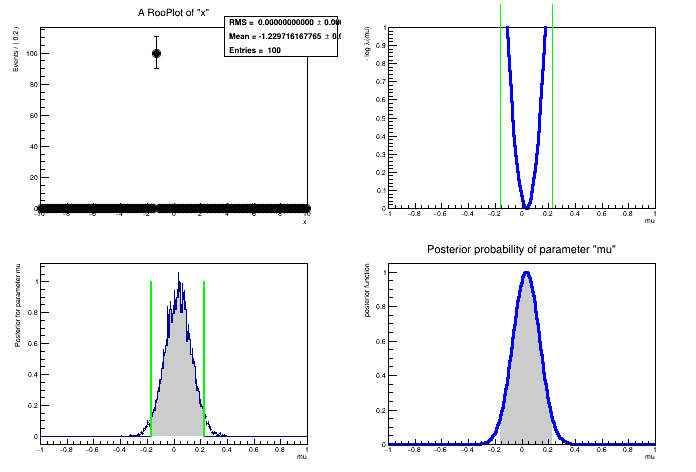

In [25]:
gROOT->GetListOfCanvases()->Draw()